### Vizualisation
vizualisation of processed data: "processed_fr.openfoodfacts.org.products.csv"

In [1]:
import pandas as pd

# import data
file_name = "processed_fr.openfoodfacts.org.products.csv"
df = pd.read_csv(file_name, header = 0, low_memory=False)

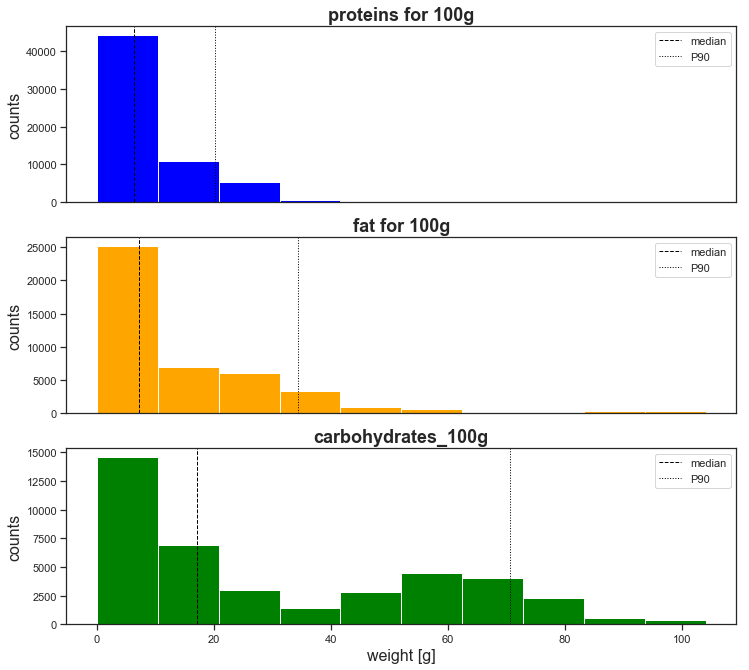

In [3]:
# carbohydrates_100g, proteins_100g, fat_100g distribution
import matplotlib.pyplot as plt
import seaborn as sns

# inputs
y1 = df["proteins_100g"].dropna()
y2 = df["fat_100g"].dropna()
y3 = df["carbohydrates_100g"].dropna()
yn = (y1,y2,y3)
TITLE = ("proteins for 100g", "fat for 100g", "carbohydrates_100g")
COLORS = ("blue", "orange", "green")

# plot
sns.set(style="ticks", palette="pastel")
plt.figure(figsize=(12,11))
for i,y in enumerate(yn):
    plt.subplot(3,1,i+1)
    plt.hist(y,color = COLORS[i])
    plt.title(TITLE[i], fontweight="bold",size = 18)
    plt.axvline(y.median(), color='black', linestyle='--', linewidth=1, label = "median")
    plt.axvline(y.quantile(0.9), color='black', linestyle=':', linewidth=1, label = "P90")
    plt.ylabel('counts', size = 16)
    plt.legend(loc='upper right')
    if i != len(yn)-1:
        plt.xticks([])
        
plt.xlabel('weight [g]', size = 16)
plt.show()

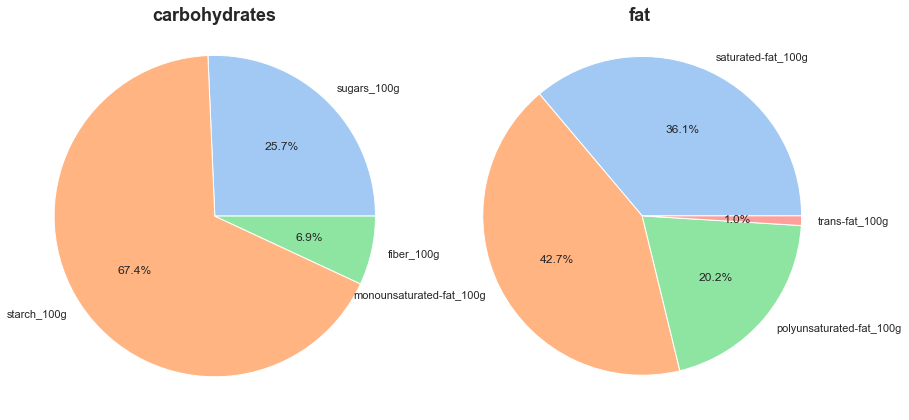

In [4]:
# repartition of the cqrbohydrates and fat sub-elements 

# inputs
carbohydrates = ["sugars_100g", "starch_100g", "fiber_100g"]
fats = ["saturated-fat_100g", "monounsaturated-fat_100g", "polyunsaturated-fat_100g", "trans-fat_100g"] 
# proteins --> no sub-elements
nutri = (carbohydrates,fats)
TITLE = ("carbohydrates", "fat")

# plot
plt.figure(figsize=(14,7))
for i,y in enumerate(nutri):
    plt.subplot(1,2,i+1)
    plt.title(TITLE[i], fontweight="bold", size = 18)
    df_pie = df.loc[:,y].dropna().sum()
    plt.pie(df_pie, labels = y, autopct='%1.1f%%')
    plt.axis("equal")
plt.show()

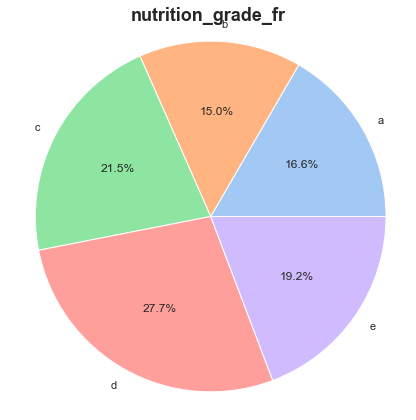

In [7]:
# nutrition_grade_fr

# inputs
x = df["nutrition_grade_fr"].value_counts().sort_index()
labels = x.index

# plot
plt.figure(figsize=(7,7))
plt.title("nutrition_grade_fr", fontweight="bold", size = 18)
plt.pie(x, labels = labels, autopct='%1.1f%%')
plt.axis("equal")
plt.show()

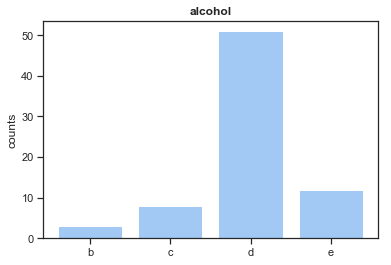

In [6]:
# Alcohol versus grade

# input
mask = df["alcohol_100g"] > 1
x = df.loc[mask,["alcohol_100g", "nutrition_grade_fr"]]
y = x["nutrition_grade_fr"].value_counts().sort_index()

# plot
plt.title("alcohol", fontweight="bold")
plt.ylabel("counts")
plt.xlabel("")
plt.bar(y.index, y)
plt.show()

In [8]:
mask = ((df["alcohol_100g"] > 1) & (df["nutrition_grade_fr"] == "b"))
df.loc[mask,["url"]].values

array([['http://world-fr.openfoodfacts.org/produit/3254383004316/eau-cristaline'],
       ['http://world-fr.openfoodfacts.org/produit/3379140135185/alcool-hua-tiao-vinaigre-de-riz-hua-diao-z'],
       ['http://world-fr.openfoodfacts.org/produit/3560070788255/pain-hot-dog-carrefour']],
      dtype=object)

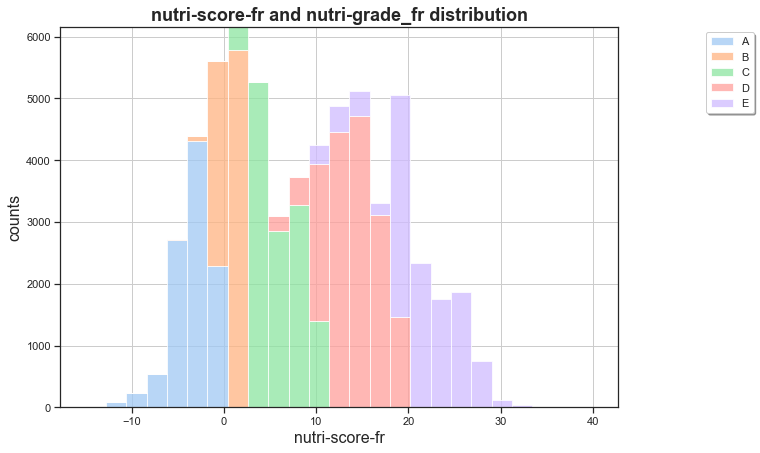

In [9]:
# Score - grade overview

# inputs
group_a = df["nutrition_grade_fr"] == "a"
group_b = df["nutrition_grade_fr"] == "b"
group_c = df["nutrition_grade_fr"] == "c"
group_d = df["nutrition_grade_fr"] == "d"
group_e = df["nutrition_grade_fr"] == "e"

# plot
plt.figure(figsize=(10,7))
plt.hist(x = [df.loc[group_a,"nutrition-score-fr_100g"].dropna(),
            df.loc[group_b,"nutrition-score-fr_100g"].dropna(),
            df.loc[group_c,"nutrition-score-fr_100g"].dropna(),
            df.loc[group_d,"nutrition-score-fr_100g"].dropna(),
            df.loc[group_e,"nutrition-score-fr_100g"].dropna()] ,
         bins = 25, alpha=0.75, stacked= True, label = ("A","B","C","D","E"));
plt.xlabel('nutri-score-fr', size = 16)
plt.ylabel('counts', size = 16)
plt.title("nutri-score-fr and nutri-grade_fr distribution", fontweight="bold", size = 18)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          fancybox=True, shadow=True, ncol=1)
plt.show()

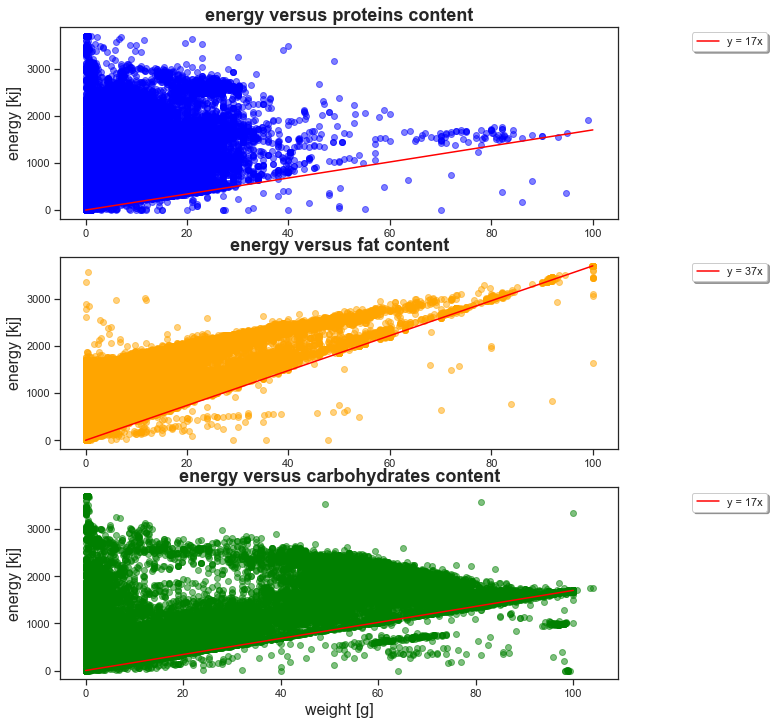

In [11]:
# macronutriment versus energy
# let's check the validity of Energy content per macronutriment (17,37,17)
import numpy as np

# inputs
x1 = df[["proteins_100g","energy_kj_100g"]].dropna()
x2 = df[["fat_100g","energy_kj_100g"]].dropna()
x3 = df[["carbohydrates_100g","energy_kj_100g"]].dropna()
xn = (x1,x2,x3)
TITLE = ("energy versus proteins content", 
         "energy versus fat content", 
         "energy versus carbohydrates content")
coef = [17, 37, 17]
COLORS = ("blue", "orange", "green")

# plot
plt.figure(figsize=(10,12))
for i,x in enumerate(xn):
    plt.subplot(3,1,i+1)
    plt.scatter(x = x.columns.values[0], y = x.columns.values[1], 
            data = x,
            c = COLORS[i],
            alpha = 0.5,
            label = "")
    u = np.linspace(0,100,10)
    plt.plot(u,u*coef[i], c="red", label= "y = {}x".format(coef[i]))
    plt.title(TITLE[i], fontweight="bold", size = 18)
    plt.ylabel("energy [kj]", size = 16)
    plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
              fancybox=True, shadow=True, ncol=1)
plt.xlabel("weight [g]", size = 16)
plt.show()


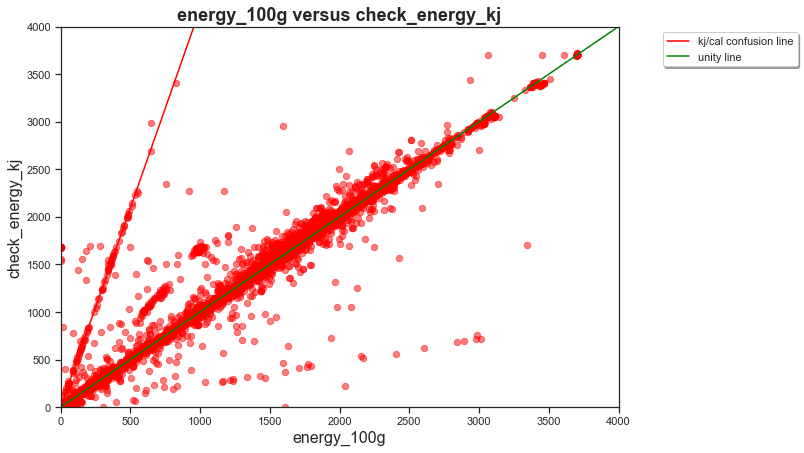

In [12]:
# energy from DB versus recomputed energy 
# --> energy_kj_100g versus check_energy_kj_100g

# inputs
x = df[["check_energy_kj_100g","energy_kj_100g"]].dropna()

# plot
plt.figure(figsize=(10,7))
plt.scatter("energy_kj_100g","check_energy_kj_100g", data = x, alpha = 0.5, s = 40, color = "red", label = "")
plt.xlim(0, 4000)
plt.ylim(0, 4000)
u = np.linspace(0,4000,10)
plt.plot(u,u*4.184, c="red", label="kj/cal confusion line")
plt.plot(u,u,c = "green",label="unity line")
plt.title("energy_100g versus check_energy_kj",fontweight="bold", size = 18)
plt.xlabel("energy_100g", size = 16)
plt.ylabel("check_energy_kj", size = 16)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          fancybox=True, shadow=True, ncol=1)
plt.show()

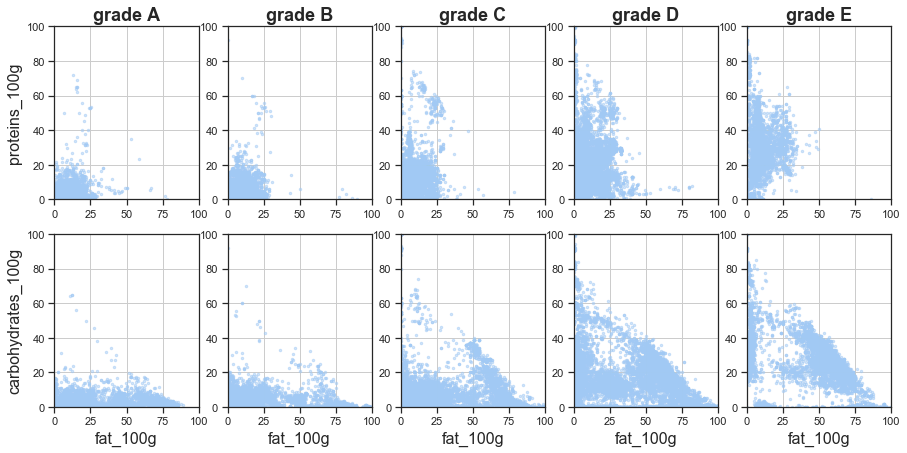

In [12]:
# macronutriment versus energy

# inputs
grades = ("a","b","c","d","e")
TITLE = ("grade A","grade B","grade C","grade D","grade E")
group, xn, yn= [], [], []
for i,g in enumerate(grades):
    group.append(df["nutrition_grade_fr"] == g)
    xn.append(df.loc[group[i],["proteins_100g","fat_100g"]].dropna())
    yn.append(df.loc[group[i],["carbohydrates_100g","fat_100g"]].dropna())
    
# plot
plt.figure(figsize=(15,7))

# plot line1 proteins versus fat
for i,x in enumerate(xn):
    plt.subplot(2,5,i+1)
    plt.scatter(x = x.columns.values[0], y = x.columns.values[1], 
            data = x, alpha = 0.5, s = 6, label = "")
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.title(TITLE[i], fontweight="bold", size = 18)
    plt.grid(True)
    if i == 0:
        plt.ylabel("proteins_100g", size = 16)

# plot line2 carbohydrates versus fat    
for i,x in enumerate(yn):
    plt.subplot(2,5,i+6)
    plt.scatter(x = x.columns.values[0], y = x.columns.values[1], 
            data = x, alpha = 0.5, s = 6, label = "")
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.xlabel("fat_100g", size = 16)
    plt.grid(True)
    if i == 0:
        plt.ylabel("carbohydrates_100g", size = 16)
        
plt.show()

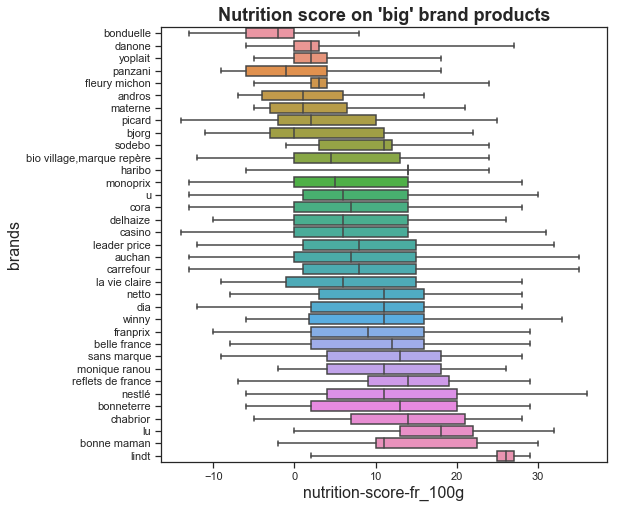

In [13]:
# top brand on the nutrition-score-fr_100g

# inputs
brands =  df["brands"].value_counts()   # number of products available per brands
bigbrands = list(brands[brands > 150].index)  # list of big brands (number of products > 150)
mask = df["brands"].isin(bigbrands)    
x = df.loc[mask,["brands", "nutrition-score-fr_100g"]]  # filtering the big brands 
# order the big brands on the P75 on nutrition-score-fr_100g:
brands =  x.groupby(["brands"])["nutrition-score-fr_100g"].quantile(0.75) 
brands = pd.DataFrame(brands)
top2bot = brands.sort_values("nutrition-score-fr_100g").index

# plot
plt.figure(figsize=(8,8))
sns.boxplot(x="nutrition-score-fr_100g", y="brands", data=x, whis="range", order = top2bot)
plt.title("Nutrition score on 'big' brand products",fontweight="bold", size = 18)
plt.xlabel("nutrition-score-fr_100g", size = 16)
plt.ylabel("brands", size = 16)
plt.show()

In [14]:
# function to look for a product
def top_products(df = df, word = "soupe", n=10):
    """look for products containing 'word' in df["categories_fr"]
    then return a data frame containing the top 'n' product ranked on nutrition-score-fr-100g.
    Return a dataframe containing: product_name, brands, nutrition-score-fr_100g, categories_fr, url """

    mask = df["categories_fr"].str.contains(word, na = False)
    x = df.loc[mask,["product_name","brands","nutrition-score-fr_100g","categories_fr","url"]]
    return x.sort_values("nutrition-score-fr_100g").head(n)

In [15]:
# example
top_products(df, "biscuit",10)

,product_name,brands,nutrition-score-fr_100g,categories_fr,url
46627,crackers complet son d'avoine,"karéléa,léa nature",-6.0,"snacks salés,apéritif,biscuits apéritifs",http://world-fr.openfoodfacts.org/produit/3760...
48419,petits crackers sans cuisson betterave & carotte,biscru,-6.0,"snacks salés,apéritif,biscuits apéritifs",http://world-fr.openfoodfacts.org/produit/3770...
29416,mini malo nature les craquelins de saint malo,les craquelins de saint malo,-5.0,"snacks sucrés,biscuits et gâteaux,snacks salés...",http://world-fr.openfoodfacts.org/produit/3300...
29410,les craquelins de saint malo nature,les craquelins de saint malo,-5.0,"snacks sucrés,biscuits et gâteaux,biscuits,cra...",http://world-fr.openfoodfacts.org/produit/3300...
29417,mini malo graines de lin les craquelins de sai...,les craquelins de saint malo,-5.0,"snacks sucrés,biscuits et gâteaux,snacks salés...",http://world-fr.openfoodfacts.org/produit/3300...
29411,le craquelins de saint malo gout sucré,les craquelins de saint malo,-5.0,"snacks sucrés,biscuits et gâteaux,biscuits,cra...",http://world-fr.openfoodfacts.org/produit/3300...
47321,smart pancake,so shape,-5.0,"snacks sucrés,biscuits et gâteaux,desserts,gât...",http://world-fr.openfoodfacts.org/produit/3760...
34233,biscuits nature & bienfaits - 100% végétal - s...,bio-soleil,-4.0,"snacks sucrés,biscuits et gâteaux,biscuits,bis...",http://world-fr.openfoodfacts.org/produit/3423...
34232,biscuit nature et bienfaits - épeautre et abri...,bio soleil,-4.0,"snacks sucrés,biscuits et gâteaux,biscuits",http://world-fr.openfoodfacts.org/produit/3423...
60917,쌀떡,송학,-4.0,"snacks sucrés,biscuits et gâteaux,biscuits,gat...",http://world-fr.openfoodfacts.org/produit/8803...


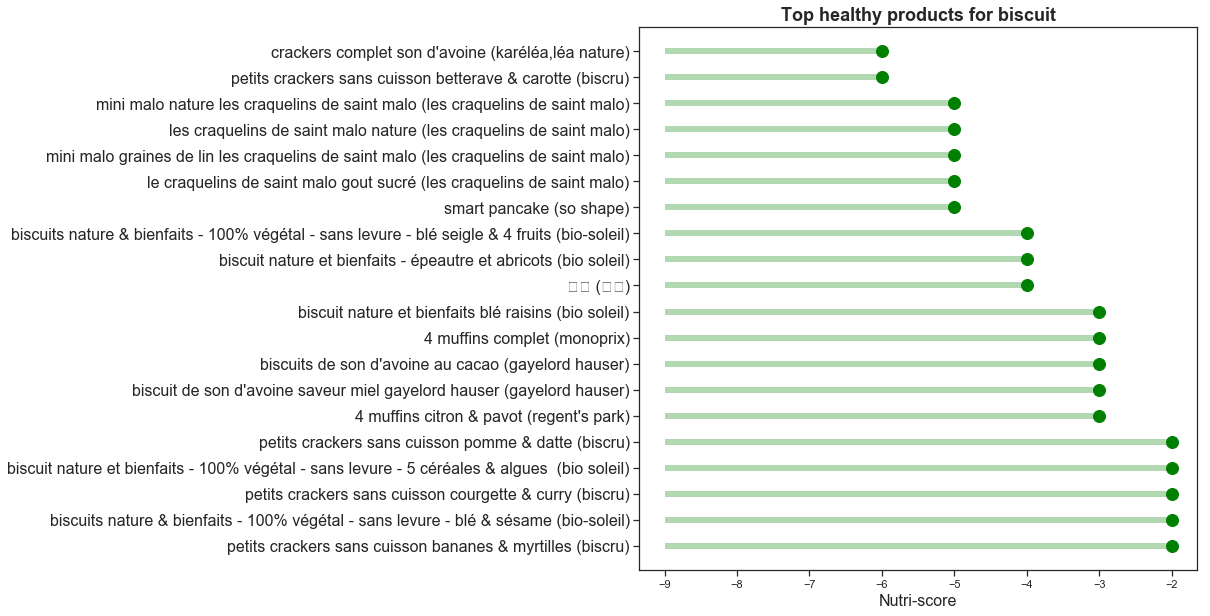

In [16]:
# Best biscuits for you?

#inputs
biscuit = top_products(df, "biscuit",20)
biscuit["name_brands"] = biscuit["product_name"] + " (" + biscuit["brands"]+ ")"
biscuit = biscuit.sort_values(ascending= False, by = "nutrition-score-fr_100g")

# plot
plt.rc('ytick', labelsize=16)
plt.figure(figsize=(10,10))
plt.hlines(y=biscuit["name_brands"], 
           xmin=biscuit["nutrition-score-fr_100g"].min()-3, 
           xmax=biscuit["nutrition-score-fr_100g"], 
           color='green', linewidth=6,
           alpha = 0.3)
plt.plot(biscuit["nutrition-score-fr_100g"],
         biscuit["name_brands"], 
         "o", markersize=12,
         color='green')
plt.title("Top healthy products for biscuit",fontweight="bold", size = 18)
plt.xlabel('Nutri-score', size = 16)
plt.ylabel('')
plt.show()